[View in Colaboratory](https://colab.research.google.com/github/sqlwu/Kaggle_HousePrice/blob/master/House_.ipynb)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%pylab inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Read the data

In [0]:
train_path = os.path.abspath('train_House.csv')

test_path = os.path.abspath('test_House.csv')

In [0]:
train = pd.read_csv(train_path)
train.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [0]:
test = pd.read_csv(test_path)
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


## Check the null data

In [0]:
feature_train, target = train, train.pop('SalePrice')
feature = pd.concat([feature_train,test])
feature.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

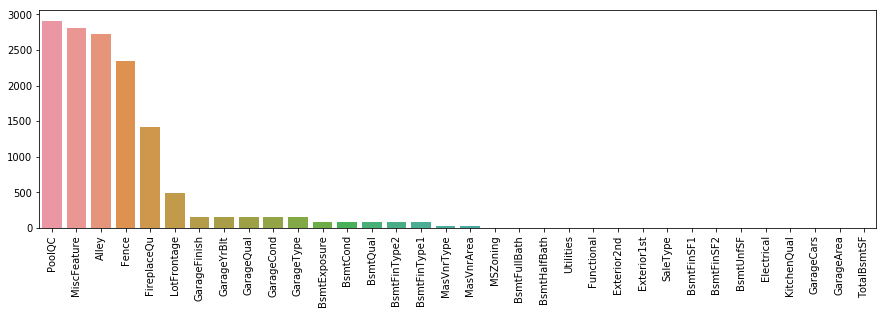

In [0]:
#check train null data
col_null_info = feature.isnull().sum(); 
col_null_info = col_null_info[col_null_info>0].sort_values(ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(x=col_null_info.index, y=col_null_info.values)
plt.xticks(rotation=90)

## Clean Null Data

In [0]:
#Clean Data
feature['MSZoning'] = feature['MSZoning'].fillna('RM')
feature['Utilities'] = feature['Utilities'].fillna(feature['Utilities'].mode())
feature['Exterior1st'] = feature['Exterior1st'].fillna(feature['Exterior1st'].mode())
feature['Exterior2nd'] = feature['Exterior2nd'].fillna('Other')
feature['BsmtFinSF1'] = feature['BsmtFinSF1'].fillna(0)
feature['BsmtFinSF2'] = feature['BsmtFinSF2'].fillna(0)
feature['BsmtUnfSF'] = feature['BsmtUnfSF'].fillna(0)
feature['TotalBsmtSF'] = feature['TotalBsmtSF'].fillna(0)
feature['BsmtFullBath'] = feature['BsmtFullBath'].fillna(0)
feature['BsmtHalfBath'] = feature['BsmtHalfBath'].fillna(0)
feature['KitchenQual'] = feature['KitchenQual'].fillna('TA')
feature['Functional'] = feature['Functional'].fillna('Typ')
feature['GarageCars'] = feature['GarageCars'].fillna(0)
feature['GarageArea'] = feature['GarageArea'].fillna(0)
feature['SaleType'] = feature['SaleType'].fillna('Oth')
feature['LotFrontage'] = feature['LotFrontage'].fillna(0)
feature['Alley'] = feature['Alley'].fillna('NA')
feature['MasVnrType'] = feature['MasVnrType'].fillna('None')
feature['MasVnrArea'] = feature['MasVnrArea'].fillna(0)
feature['BsmtQual'] = feature['BsmtQual'].fillna('NA')
feature['BsmtCond'] = feature['BsmtCond'].fillna('NA')
feature['BsmtExposure'] = feature['BsmtExposure'].fillna('NA')
feature['BsmtFinType1'] = feature['BsmtFinType1'].fillna('NA')
feature['BsmtFinType2'] = feature['BsmtFinType2'].fillna('NA')
feature['Electrical'] = feature['Electrical'].fillna(feature['Electrical'].mode())
feature['FireplaceQu'] = feature['FireplaceQu'].fillna('No_Fireplace')
feature['GarageType'] = feature['GarageType'].fillna('NA')
feature['GarageYrBlt'] = feature['GarageYrBlt'].fillna(feature['YrSold'])
feature['GarageFinish'] = feature['GarageFinish'].fillna('NA')
feature['GarageQual'] = feature['GarageQual'].fillna('No_Garage')
feature['GarageCond'] = feature['GarageCond'].fillna('No_Garage')
feature['PoolQC'] = feature['PoolQC'].fillna('No_Pool')
feature['Fence'] = feature['Fence'].fillna('NA')
feature['MiscFeature'] = feature['MiscFeature'].fillna('NA')

## View all columns' distribution

In [0]:
#Here use for summary the categorical columns
feature['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

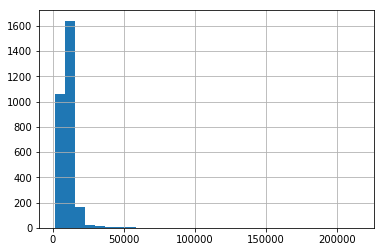

In [0]:
#Here use for showing the distribution of the data
feature['LotArea'].hist(bins=30)

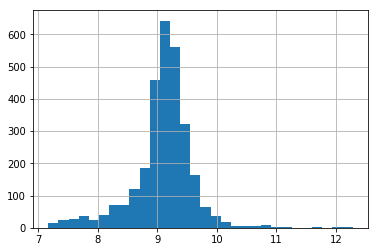

In [0]:
#Here use for showing the distribution after log transformation
feature['LotArea'].apply(np.log1p).hist(bins=30)

In [0]:
#Numerical columns use log transformation
log1p_col = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','BsmtUnfSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for col in log1p_col:
    feature[col] = feature[col].apply(np.log1p)

#Calculate the building age and binning the age
feature['Building_age'] = feature['YrSold'] - feature['YearBuilt']
for idx in feature.loc[feature.Building_age<0].index:
    feature.loc[idx, 'Building_age'] = 0
feature['Building_age_class'] = pd.cut(feature['Building_age'], bins=14)
feature['Building_age'] = feature['Building_age'].apply(np.log1p)

In [0]:
#Calculate the age of the house after remodification and binning the age
feature['Remod_age'] = feature['YrSold'] - feature['YearRemodAdd']
feature['Remod_age_class'] = pd.cut(feature['Remod_age'], bins=6)
for idx in feature.loc[feature.Remod_age<0].index:
    feature.loc[idx, 'Remod_age'] = 0
feature['Remod_age'] = feature['Remod_age'].apply(np.log1p)

#Calculate the age of garage and binning the age
feature['GarageYrBlt_age'] = feature['YrSold'] - feature['GarageYrBlt']
feature['GarageYrBlt_age_class'] = pd.cut(feature['GarageYrBlt_age'], bins=10)
for idx in feature.loc[feature.GarageYrBlt_age<0].index:
    feature.loc[idx, 'GarageYrBlt_age'] = 0
feature['GarageYrBlt_age'] = feature['GarageYrBlt_age'].apply(np.log1p)

In [0]:
#Map the quality to different grade
exter_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'Na':0,
              'No_Fireplace':0, 'No_Garage':0, 'No_Pool':0}
feature['ExterQual'] = feature['ExterQual'].map(exter_qual)
feature['ExterCond'] = feature['ExterCond'].map(exter_qual)
feature['HeatingQC'] = feature['HeatingQC'].map(exter_qual)
feature['KitchenQual'] = feature['KitchenQual'].map(exter_qual)
feature['FireplaceQu'] = feature['FireplaceQu'].map(exter_qual)
feature['GarageQual'] = feature['GarageQual'].map(exter_qual)
feature['GarageCond'] = feature['GarageCond'].map(exter_qual)
feature['PoolQC'] = feature['PoolQC'].map(exter_qual)

#Map the basement quality and condition
bsmt_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
feature['BsmtQual'] = feature['BsmtQual'].map(bsmt_qual)
feature['BsmtCond'] = feature['BsmtCond'].map(bsmt_qual)

In [0]:
#Map the basement exposure
bsmtexposure_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
feature['BsmtExposure'] = feature['BsmtExposure'].map(bsmtexposure_map)

#Map the landslope to different grade
slop_map = {'Gtl':3, 'Mod':2, 'Sev':1}
feature['LandSlope_class'] = feature['LandSlope'].map(slop_map)

In [0]:
#Mape the land contour to different class
landcounter_map = {'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1}
feature['LandContour_class'] = feature['LandContour'].map(landcounter_map)

#Map the utilities to different level
utilities_map = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
feature['Utilities_class'] = feature['Utilities'].map(utilities_map)
feature['Utilities_class'] = feature['Utilities_class'].fillna(4)

In [0]:
#Map the basement finish type to different level
bsmt_FinType = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
feature['BsmtFinType1'] = feature['BsmtFinType1'].map(bsmt_FinType)
feature['BsmtFinType2'] = feature['BsmtFinType2'].map(bsmt_FinType)

#Map the fence to different level
fence_qual = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
feature['Fence'] = feature['Fence'].map(fence_qual)

In [0]:
#Calculate the sum of condition
condition_map = {'Artery':2, 'Feedr':2, 'Norm':1, 'RRNn':2, 'RRAn':2, 'PosN':2, 'PosA':2, 'RRNe':2, 'RRAe':2}
feature['ConditionSum'] = feature['Condition2'].map(condition_map)

#Map the garage finish situation to different level
finish_map = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}
feature['GarageFinish_class'] = feature['GarageFinish'].map(finish_map)

In [0]:
#Change column type to object column(use for one hot encoding)
feature['MSSubClass'] = feature['MSSubClass'].astype('object')
feature['BsmtFullBath'] = feature['BsmtFullBath'].astype('object')
feature['BsmtHalfBath'] = feature['BsmtHalfBath'].astype('object')
feature['Fireplaces'] = feature['Fireplaces'].astype('object')
feature['GarageCars'] = feature['GarageCars'].astype('object')
feature['YrSold'] = feature['YrSold'].astype('object')

In [0]:
#Map the month to season
season_map = {1:1,2:1,3:1,
              4:2,5:2,6:2,
             7:3,8:3,9:3,
             10:4,11:4,12:4}
feature['SeasonSold'] = feature['MoSold'].map(season_map)

In [0]:
feature[1:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Building_age,Building_age_class,Remod_age,Remod_age_class,GarageYrBlt_age,GarageYrBlt_age_class,LandSlope_class,LandContour_class,Utilities_class,ConditionSum,GarageFinish_class,SeasonSold
1,2,20,RL,4.394449,9.169623,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,6.886532,1,0.0,5.652489,7.141245,GasA,5,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,6.133398,3,3,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,0,0,NA,0.0,5,2007,WD,Normal,3.465736,"(29.143, 38.857]",3.465736,"(29.0, 39.333]",3.465736,"(19.8, 51.2]",3,4,4.0,1,2,2
2,3,60,RL,4.234107,9.328212,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,6.188264,1,0.0,6.075346,6.825460,GasA,5,Y,SBrkr,6.825460,6.765039,0.0,7.488294,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,6.411818,3,3,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,0,0,NA,0.0,9,2008,WD,Normal,2.079442,"(-0.136, 9.714]",1.945910,"(-2.062, 8.333]",2.079442,"(-11.6, 19.8]",3,4,4.0,1,2,3
3,4,70,RL,4.110874,9.164401,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,5.379897,1,0.0,6.293419,6.629363,GasA,4,Y,SBrkr,6.869014,6.629363,0.0,7.448916,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,6.466145,3,3,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,0,0,NA,0.0,2,2006,WD,Abnorml,4.521789,"(87.429, 97.143]",3.610918,"(29.0, 39.333]",2.197225,"(-11.6, 19.8]",3,4,4.0,1,1,1
4,5,60,RL,4.442651,9.565284,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,6.486161,1,0.0,6.196444,7.044033,GasA,5,Y,SBrkr,7.044033,6.960348,0.0,7.695758,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,6.729824,3,3,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,0,0,NA,0.0,12,2008,WD,Normal,2.197225,"(-0.136, 9.714]",2.197225,"(-2.062, 8.333]",2.197225,"(-11.6, 19.8]",3,4,4.0,1,2,4


## One hot encoding

In [0]:
#Categorical columns use one hot encoding
feature = pd.get_dummies(feature)

In [0]:
#Seperate the training data and testing data
train_data = feature[feature.Id<=1460]
test_data = feature[feature.Id>1460]

In [0]:
#Use the log transformation to the target
target = pd.DataFrame({'SalePrice':target})
target = target.apply(np.log)

In [0]:
#Conbine the training data and target
train_data = pd.concat([train_data,target],axis=1)

In [0]:
#Check the shape of the training data
train_data.shape

(1460, 316)

In [0]:
test_data.shape

(1459, 315)

## Output csv

In [0]:
train_data.to_csv('train_one_hot.csv')
test_data.to_csv('test_one_hot.csv')

## Linear Model For Regression Analysis

In [0]:
# Import some useful module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%pylab inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 4)

Populating the interactive namespace from numpy and matplotlib


C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
# Import dataset and linear model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [0]:
df = pd.read_csv('train_one_hot.csv')
df.head(2)

,Unnamed: 0,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Building_age,Remod_age,GarageYrBlt_age,LandSlope_class,LandContour_class,Utilities_class,ConditionSum,GarageFinish_class,SeasonSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0.0,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,Garag

In [0]:
#Check whether have null data
null_check = df.isnull().sum()
null_check[null_check>0]

Series([], dtype: int64)

In [0]:
#Seperate the feature and the target
df, df_R = df, df.pop('SalePrice')

In [0]:
#Pop unnecessary columns
df.pop('Id');
df.pop('Unnamed: 0');

In [0]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Building_age,Remod_age,GarageYrBlt_age,LandSlope_class,LandContour_class,Utilities_class,ConditionSum,GarageFinish_class,SeasonSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0.0,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,Gara

## Cross-validation

In [0]:
from sklearn.cross_validation import train_test_split
#Seperate the training/ validation/ testing set
x_train, x_test, y_train, y_test = train_test_split(df,df_R,random_state = 42, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Training the different model and compute MSE

In [0]:
#Least Square Regression
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_valid)
print('Linear Regression Model:')
print('\t RMSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_lr))))
print('\t Training Score: {:.4f}'.format(lr.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(lr.score(x_valid, y_valid),4))

#Ridge Regression
rg = linear_model.Ridge()
rg.fit(x_train, y_train)
predict_rg = rg.predict(x_valid)
print('Ridge Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_rg))))
print('\t Training Score: {:.4f}'.format(rg.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(rg.score(x_valid, y_valid),4))

#Lasso Regression
ls = linear_model.Lasso()
ls.fit(x_train, y_train)
predict_ls = ls.predict(x_valid)
print('Lasso Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_ls))))
print('\t Training Score: {:.4f}'.format(ls.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(ls.score(x_valid, y_valid),4))

#ElasticNet Regression
en = linear_model.ElasticNet()
en.fit(x_train, y_train)
predict_en = en.predict(x_valid)
print('ElasticNet Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_en))))
print('\t Training Score: {:.4f}'.format(en.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(en.score(x_valid, y_valid),4))

Linear Regression Model:
	 RMSE = 0.1411
	 Training Score: 0.9545
	 Validation Score: 0.8793
Ridge Regression Model:
	 MSE = 0.1376
	 Training Score: 0.9481
	 Validation Score: 0.8851
Lasso Regression Model:
	 MSE = 0.2915
	 Training Score: 0.4481
	 Validation Score: 0.4847
ElasticNet Regression Model:
	 MSE = 0.2849
	 Training Score: 0.4599
	 Validation Score: 0.5077


## Tunning Ridge

In [0]:
#Prepare CV dataset
cv_x_data = pd.concat([x_train, x_valid])
cv_y_data = pd.concat([y_train, y_valid])

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid_R = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_R = GridSearchCV(linear_model.Ridge(), param_grid_R, cv=5)

In [0]:
grid_search_R.fit(cv_x_data, cv_y_data)
print('Best parameter of Ridge is:', grid_search_R.best_params_)
print('Best score of cv is: {:.4f}'.format(grid_search_R.best_score_))

Best parameter of Ridge is: {'alpha': 10}
Best score of cv is: 0.8889


In [0]:
rg2 = linear_model.Ridge(alpha=10)
rg2.fit(cv_x_data, cv_y_data)
predictR2 = rg2.predict(x_test)

print('Ridge Regression Model:')
print('MSE =', sqrt(mean_squared_error(y_test, predictR2)))
print('Training Score: {:.4f}'.format(rg2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(rg2.score(x_test, y_test)))

Ridge Regression Model:
MSE = 0.12909224230396926
Training Score: 0.9270
Testing Score: 0.9107


## Tunning Lasso regression

In [0]:
param_grid_L = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_L = GridSearchCV(linear_model.Lasso(),param_grid_L,cv=5)
grid_search_L.fit(cv_x_data, cv_y_data)
print('Best parameter of Lasso is:', grid_search_L.best_params_)
print('Best score of cv is:', grid_search_L.best_score_)

Best parameter of Lasso is: {'alpha': 0.001}
Best score of cv is: 0.8969208891940463


In [0]:
ls2 = linear_model.Lasso(alpha=0.001)
ls2.fit(cv_x_data, cv_y_data)
predictL3 = ls2.predict(x_test)

print('Lasso Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_test, predictL3)))
print('Training Score: {:.4f}'.format(ls2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(ls2.score(x_test, y_test)))

Lasso Regression Model:

MSE = 0.13270455377247678
Training Score: 0.9131
Testing Score: 0.9056


## Tunning ElasticNet

In [0]:
param_grid_E = {'alpha':[0.001,0.01,0.1,1,10,100],
               'l1_ratio':[x/100 for x in range(1,100,100)]}

grid_search_E = GridSearchCV(linear_model.ElasticNet(),param_grid_E,cv=5)
grid_search_E.fit(cv_x_data, cv_y_data)
print('Best parameter of ElasticNet is:', grid_search_E.best_params_)
print('Best score of cv is:', grid_search_E.best_score_)

C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

Best parameter of ElasticNet is: {'alpha': 0.01, 'l1_ratio': 0.01}
Best score of cv is: 0.8906586059461202


In [0]:
en2 = linear_model.ElasticNet(alpha=0.01,l1_ratio=0.01)
en2.fit(cv_x_data, cv_y_data)
predictE4 = en2.predict(x_test)

print('ElasticNet Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_test, predictE4)))
print('Training Score: {:.4f}'.format(en2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(en2.score(x_test, y_test)))

ElasticNet Regression Model:

MSE = 0.1295964482448692
Training Score: 0.9236
Testing Score: 0.9100


## Forward Stepwise Strategy

In [0]:
#Select the numerical columns
numerical_col = ['LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']
df_FSS = cv_x_data[numerical_col]

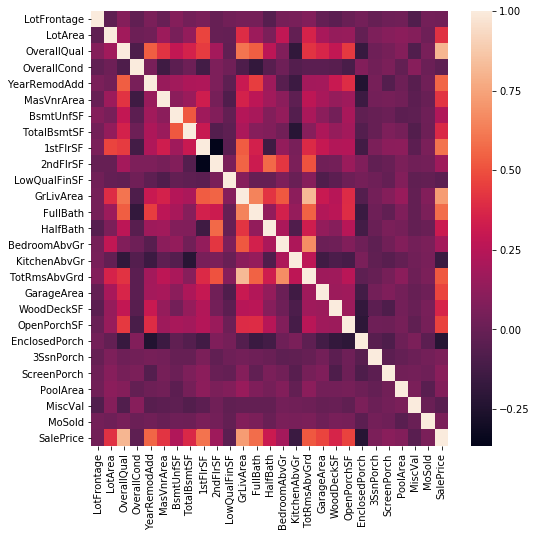

In [0]:
# Use heatmap to view the correlation
df_all = pd.concat([df_FSS,cv_y_data],axis=1)
plt.figure(figsize=(8,8))
sns.heatmap(df_all.corr())

In [0]:
# Sort the correlation to add the preditor one by one.
df_all_corr = df_all.corr()
corr = abs(df_all_corr['SalePrice']).sort_values(ascending=False)
corr = corr.drop('SalePrice')
corr

OverallQual      0.8079
GrLivArea        0.7236
1stFlrSF         0.5952
FullBath         0.5837
YearRemodAdd     0.5622
TotRmsAbvGrd     0.5201
GarageArea       0.4691
OpenPorchSF      0.4612
MasVnrArea       0.4200
LotArea          0.4113
TotalBsmtSF      0.3797
WoodDeckSF       0.3627
HalfBath         0.3123
BsmtUnfSF        0.2298
EnclosedPorch    0.2260
BedroomAbvGr     0.1933
2ndFlrSF         0.1714
KitchenAbvGr     0.1576
ScreenPorch      0.1074
PoolArea         0.0844
3SsnPorch        0.0648
MoSold           0.0557
MiscVal          0.0487
LowQualFinSF     0.0408
OverallCond      0.0344
LotFrontage      0.0309
Name: SalePrice, dtype: float64

In [0]:
# Use the forward stepwise strategy to run the linear square regression.
forward_predictor = pd.DataFrame()
forward_test = pd.DataFrame()
PredictorNum = []
MSE = []
training_score = []
valid_score = []

for i in range(len(corr)):
    mse_value = 0
    forward_predictor[corr.index[i]] = df_FSS[corr.index[i]]
    forward_test[corr.index[i]] = x_test[corr.index[i]]
    
    #assign model here
    model = linear_model.LinearRegression()
    model.fit(forward_predictor,cv_y_data)
    PredictorNum.append(len(forward_predictor.columns))
    mse_value = mean_squared_error(cv_y_data,model.predict(forward_predictor))
    MSE.append(sqrt(mse_value))
    training_score.append(model.score(forward_predictor,cv_y_data))
    valid_score.append(model.score(forward_test,y_test))
    print('Feature number: {}, MSE = {:.4f}'.format(i+1,mse_value))
    
mse = pd.DataFrame({'PredictorNum':PredictorNum,'MSE':MSE,
                    'Train_Score':training_score,'Test_Score':valid_score})

Feature number: 1, MSE = 0.0529
Feature number: 2, MSE = 0.0396
Feature number: 3, MSE = 0.0354
Feature number: 4, MSE = 0.0350
Feature number: 5, MSE = 0.0314
Feature number: 6, MSE = 0.0313
Feature number: 7, MSE = 0.0288
Feature number: 8, MSE = 0.0286
Feature number: 9, MSE = 0.0283
Feature number: 10, MSE = 0.0259
Feature number: 11, MSE = 0.0254
Feature number: 12, MSE = 0.0251
Feature number: 13, MSE = 0.0245
Feature number: 14, MSE = 0.0239
Feature number: 15, MSE = 0.0237
Feature number: 16, MSE = 0.0237
Feature number: 17, MSE = 0.0235
Feature number: 18, MSE = 0.0230
Feature number: 19, MSE = 0.0228
Feature number: 20, MSE = 0.0226
Feature number: 21, MSE = 0.0226
Feature number: 22, MSE = 0.0226
Feature number: 23, MSE = 0.0226
Feature number: 24, MSE = 0.0224
Feature number: 25, MSE = 0.0219
Feature number: 26, MSE = 0.0219


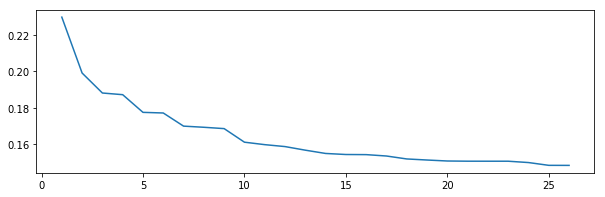

In [0]:
# View the MSE of each quantities of predictors.
plt.figure(figsize=(10,3))
plt.plot(mse['PredictorNum'],mse['MSE'])

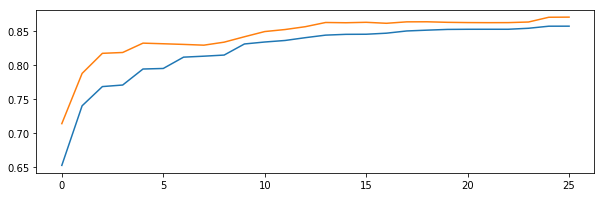

In [0]:
#Compare the training score and testing score
plt.figure(figsize=(10,3))
plt.plot(mse['Train_Score'])
plt.plot(mse['Test_Score'])

In [0]:
mse['Test_Score'].max()

0.8696123970366502

## Emsemble

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\wuc24\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
df = pd.read_csv('train_one_hot.csv')
feature, target = df, df.pop('SalePrice')

In [0]:
feature.head()

,Unnamed: 0,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Building_age,Remod_age,GarageYrBlt_age,LandSlope_class,LandContour_class,Utilities_class,ConditionSum,GarageFinish_class,SeasonSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0.0,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,Garag

In [0]:
feature = feature.drop('Id',axis=1)
feature = feature.drop('Unnamed: 0', axis=1)

In [0]:
feature.shape

(1460, 314)

In [0]:
#Fit Lasso model
ls2 = Lasso(alpha=0.001)
ls2.fit(feature, target)
predictL3 = ls2.predict(feature)

print('Lasso Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(target, predictL3)))

Lasso Regression Model:

MSE = 0.11534953161995402


In [0]:
#Fit Ridge
rg2 = Ridge(alpha=10)
rg2.fit(feature, target)
predictR2 = rg2.predict(feature)

print('Ridge Regression Model:')
print('MSE =', sqrt(mean_squared_error(target, predictR2)))

Ridge Regression Model:
MSE = 0.10597973290082194


In [0]:
#Fit ElasticNet
en2 = ElasticNet(alpha=0.01,l1_ratio=0.01)
en2.fit(feature, target)
predictE4 = en2.predict(feature)

print('ElasticNet Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(target, predictE4)))

ElasticNet Regression Model:

MSE = 0.10961564970466749


In [0]:
#Merge output
step1_target = pd.DataFrame({'Lasso':ls2.predict(feature),
                            'Ridge':rg2.predict(feature),
                            'ElasticNet':en2.predict(feature)})
step1_target.shape

(1460, 3)

## Model Ensembling

In [0]:
xgbr = xgb.XGBRegressor(colsample_bytree=0.5,learning_rate=0.1,max_depth=5,min_child_weight=1,subsample=0.6)
xgbr.fit(step1_target, target)
predict_xgb = xgbr.predict(step1_target)

print('XGBoosting Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(target, predict_xgb)))

XGBoosting Regression Model:

MSE = 0.08583988402702575


## Predict data

In [0]:
test_data = pd.read_csv('test_one_hot.csv')
test_id = test_data['Id']
test_data = test_data[test_data.columns[2:]]

null_check = test_data.isnull().sum()
null_check[null_check>0]

Series([], dtype: int64)

In [0]:
test_step1_target = pd.DataFrame({'Lasso':ls2.predict(test_data),
                            'Ridge':rg2.predict(test_data),
                            'ElasticNet':en2.predict(test_data)})

predict_price = xgbr.predict(test_step1_target)
predict_price = np.expm1(predict_price)

submit = pd.DataFrame({'Id':test_id,'SalePrice':predict_price})
submit.to_csv('submit_House.csv', index=False)